# Well-being

## Used variables

|Variável	|Indicador|
|----       |----    |
|Modalidade em que o indivíduo tem interesse	|ModalidadeInterese_1|
|Valor do Desporto (ValorDesp)	|ValorDesp_1|
|                               |ValorDesp_2|
|Participação Desportiva (PartDesp)	|PartDesp_1|
|	                                |PartDesp_2|
|Federado	|1=Nao,2=sim|
|Modalidade em que está federado	|FederacaoModalidade|
|Bem Estar Subjetivo	|BemEstarSubjetivo|
|Género	|Genero 1 Mulher / 2 Homens |
|Idade	|Idade|
|Estado Civil	|1 = Single, not married; 2 = Couple; 3 = Divorcied; 4 = In union of fact; 5 = Widow|
|Região	|Regiao|
|Instituição	|Instituicao|


## Transformação variáveis

1. Passar de escala ordinal para categorias (nominais);
2. Variável Valor percebido do desporto (indicadores VD1 e VD2): 1 a 3 = Mau; 5 a 7 = Bom; sendo o valor 4 ponto intermédio da escala, proponho que não consideres esses indivíduos;
3. Variável Participação desportiva (indicadores PD1 e PD2): 1 = Não; 2 a 5 = Sim;
4. Variável Bem estar subjetivo (indicador BES1): 0 a 4 : Negativo; 6 a 10 = Positivo; 5 ponto intermédio da escala não utilizar;

In [14]:
import pandas as pd
from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import preprocessing

dt = pd.read_excel('https://raw.githubusercontent.com/pesobreiro/jupyternotebooks/master/dados/wellbeingPrediction.xlsx',
                   index_col=0)

In [15]:
dt.columns

Index(['id', 'Angariador', 'Inicio', 'Ultimamodificação', 'IP', 'email',
       'OrgulhoNacional_1', 'OrgulhoNacional_2', 'OrgulhoNacional_3',
       'OrgulhoNacional_4', 'OrgulhoNacional_5', 'OrgulhoNacional_6',
       'OrgulhoNacional_7', 'OrgulhoNacional_8', 'OrgulhoNacional_9',
       'OrgulhoNacional_10', 'OrgNacDesp_1', 'OrgNacDesp_2',
       'ModalidadeInterese_1', 'ModalidadeInterese_2', 'ModalidadeInterese_3',
       'AssitEspecta_1', 'AssitEspecta_2', 'AssitEspecta_3', 'AssitEspecta_4',
       'AssitEspecta_5', 'ValorDesp_1', 'ValorDesp_2', 'InvestDesp_1',
       'PartDesp_1', 'PartDesp_2', 'Federacao', 'FederacaoModalidade',
       'BemEstarSubjetivo', 'Genero', 'Idade', 'EstadoCivil', 'Regiao',
       'Instituicao'],
      dtype='object')

## Limpar dados que não interessam

In [16]:
colLimpar=['id', 'Angariador', 'Inicio', 'Ultimamodificação', 'IP',
       'email', 'OrgulhoNacional_1', 'OrgulhoNacional_2', 'OrgulhoNacional_3',
       'OrgulhoNacional_4', 'OrgulhoNacional_5', 'OrgulhoNacional_6',
       'OrgulhoNacional_7', 'OrgulhoNacional_8', 'OrgulhoNacional_9',
       'OrgulhoNacional_10', 'OrgNacDesp_1', 'OrgNacDesp_2','ModalidadeInterese_1', 'ModalidadeInterese_2', 'ModalidadeInterese_3',
       'AssitEspecta_1', 'AssitEspecta_2', 'AssitEspecta_3', 'AssitEspecta_4',
       'AssitEspecta_5', 'InvestDesp_1','FederacaoModalidade','Instituicao']

In [17]:
dt.drop(colLimpar,axis=1,inplace=True)

In [18]:
dt

,ValorDesp_1,ValorDesp_2,PartDesp_1,PartDesp_2,Federacao,BemEstarSubjetivo,Genero,Idade,EstadoCivil,Regiao
NumeroOrdem,,,,,,,,,,
0.0,4.0,3.0,3.0,3.0,1.0,8.0,1.0,19.0,1.0,3.0
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,3.0,5.0,4.0,5.0,1.0,6.0,2.0,21.0,1.0,4.0
3.0,5.0,6.0,5.0,5.0,2.0,9.0,2.0,20.0,1.0,5.0
4.0,3.0,4.0,4.0,5.0,1.0,5.0,2.0,20.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
566.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,99.0,1.0,1.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dt.EstadoCivil.value_counts()

1.0    429
2.0     37
4.0     32
3.0      5
5.0      1
Name: EstadoCivil, dtype: int64

In [20]:
dt.shape

(571, 10)

In [21]:
dt.columns

Index(['ValorDesp_1', 'ValorDesp_2', 'PartDesp_1', 'PartDesp_2', 'Federacao',
       'BemEstarSubjetivo', 'Genero', 'Idade', 'EstadoCivil', 'Regiao'],
      dtype='object')

## Limpar todas as linhas que têm nans

In [22]:
dt.dropna(axis=0,how='any',inplace=True)

In [23]:
dt.describe()

,ValorDesp_1,ValorDesp_2,PartDesp_1,PartDesp_2,Federacao,BemEstarSubjetivo,Genero,Idade,EstadoCivil,Regiao
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,5.404382,4.607570,2.830677,3.101594,1.151394,8.155378,1.326693,24.832669,1.292829,2.673307
std,1.111463,1.200209,1.271998,1.293172,0.358790,1.911140,0.469472,8.571636,0.796642,1.194149
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,5.000000,4.000000,2.000000,2.000000,1.000000,7.000000,1.000000,20.000000,1.000000,2.000000
50%,6.000000,5.000000,3.000000,3.000000,1.000000,8.500000,1.000000,22.000000,1.000000,3.000000
75%,6.000000,5.000000,4.000000,4.000000,1.000000,9.000000,2.000000,25.000000,1.000000,3.000000
max,7.000000,7.000000,5.000000,6.000000,2.000000,11.000000,2.000000,99.000000,5.000000,7.000000


## Existem nulos?

In [24]:
dt.isnull().any().sum()

0

In [25]:
dt.shape

(502, 10)

In [26]:
dt.Genero.value_counts()

1.0    338
2.0    164
Name: Genero, dtype: int64

In [27]:
print("Mulheres",338/502)
print("Homenss",164/502)

Mulheres 0.6733067729083665
Homenss 0.32669322709163345


(1 = Single, not married; 2 = Couple; 3 = Divorcied; 4 = In union of fact; 5 = Widow)

In [28]:
a = dt.EstadoCivil.value_counts()
a=a.reset_index()
a['EstadoCivil']

0    427
1     37
2     32
3      5
4      1
Name: EstadoCivil, dtype: int64

In [29]:
a['perc']=a['EstadoCivil'].apply(lambda x: x/502)

In [30]:
a

,index,EstadoCivil,perc
0,1.0,427,0.850598
1,2.0,37,0.073705
2,4.0,32,0.063745
3,3.0,5,0.009960
4,5.0,1,0.001992


## Tipos de dados

In [31]:
dt.dtypes

ValorDesp_1          float64
ValorDesp_2          float64
PartDesp_1           float64
PartDesp_2           float64
Federacao            float64
BemEstarSubjetivo    float64
Genero               float64
Idade                float64
EstadoCivil          float64
Regiao               float64
dtype: object

In [32]:
dt.columns

Index(['ValorDesp_1', 'ValorDesp_2', 'PartDesp_1', 'PartDesp_2', 'Federacao',
       'BemEstarSubjetivo', 'Genero', 'Idade', 'EstadoCivil', 'Regiao'],
      dtype='object')

## Substituir os nulos por mediana

colunas=['ModalidadeInterese_1', 'ValorDesp_1', 'ValorDesp_2', 'PartDesp_1',
       'PartDesp_2', 'Federacao', 'FederacaoModalidade', 'BemEstarSubjetivo',
       'Genero', 'Idade', 'EstadoCivil', 'Regiao']
for col in colunas:
    dt[col].fillna(round(dt[col].median(),0), inplace=True)
dt.head()

dt['Instituicao'].unique()

dt=pd.get_dummies(dt, columns=['Instituicao'])

In [33]:
dt.columns

Index(['ValorDesp_1', 'ValorDesp_2', 'PartDesp_1', 'PartDesp_2', 'Federacao',
       'BemEstarSubjetivo', 'Genero', 'Idade', 'EstadoCivil', 'Regiao'],
      dtype='object')

In [34]:
vars=['ValorDesp_1', 'ValorDesp_2', 'PartDesp_1', 'PartDesp_2', 'Federacao','BemEstarSubjetivo', 'Genero', 'Idade', 'EstadoCivil', 'Regiao']
for var in vars:
    print(dt.groupby(dt[var]).count().iloc[:,1])

ValorDesp_1
1.0      4
2.0      2
3.0     19
4.0     72
5.0    138
6.0    199
7.0     68
Name: PartDesp_1, dtype: int64
ValorDesp_2
1.0      2
2.0      4
3.0    114
4.0     88
5.0    179
6.0     91
7.0     24
Name: PartDesp_1, dtype: int64
PartDesp_1
1.0    106
2.0     92
3.0    130
4.0    129
5.0     45
Name: ValorDesp_2, dtype: int64
PartDesp_2
1.0     72
2.0     70
3.0    182
4.0    114
5.0     41
6.0     23
Name: ValorDesp_2, dtype: int64
Federacao
1.0    426
2.0     76
Name: ValorDesp_2, dtype: int64
BemEstarSubjetivo
1.0       4
2.0       4
3.0       6
4.0       8
5.0      20
6.0      46
7.0      59
8.0     104
9.0     146
10.0     58
11.0     47
Name: ValorDesp_2, dtype: int64
Genero
1.0    338
2.0    164
Name: ValorDesp_2, dtype: int64
Idade
18.0    19
19.0    50
20.0    77
21.0    80
22.0    55
23.0    46
24.0    33
25.0    18
26.0    16
27.0    10
28.0     4
29.0     8
30.0     7
31.0     9
32.0     3
33.0     7
34.0     8
35.0     3
36.0     4
37.0     8
38.0     4
39.0     

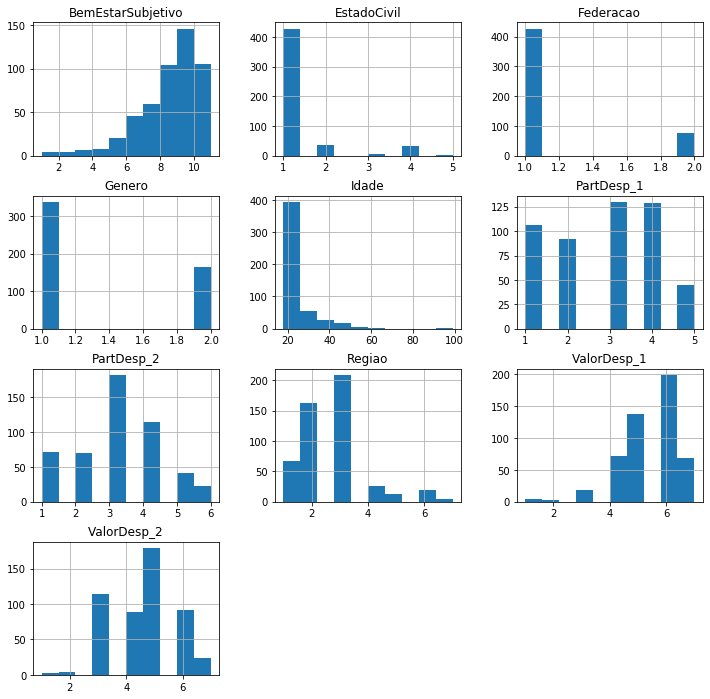

In [35]:
%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize']=[12,12]
dt.hist();

## Criar a variável dependente 

In [36]:
dt.loc[dt['BemEstarSubjetivo']==1]

,ValorDesp_1,ValorDesp_2,PartDesp_1,PartDesp_2,Federacao,BemEstarSubjetivo,Genero,Idade,EstadoCivil,Regiao
NumeroOrdem,,,,,,,,,,
135.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,19.0,1.0,3.0
354.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,31.0,1.0,2.0
478.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,18.0,1.0,3.0
483.0,5.0,5.0,1.0,3.0,1.0,1.0,1.0,25.0,1.0,3.0


## Dicotimizar Bem estar

In [37]:
dt['BemEstarSubjetivo'].unique()

array([ 8.,  6.,  9.,  5., 10., 11.,  3.,  7.,  1.,  4.,  2.])

## Bem estar baixo

In [38]:
dt.loc[dt['BemEstarSubjetivo']==1,'BemEstarSubjetivo']=0
dt.loc[dt['BemEstarSubjetivo']==2,'BemEstarSubjetivo']=0
dt.loc[dt['BemEstarSubjetivo']==3,'BemEstarSubjetivo']=0
dt.loc[dt['BemEstarSubjetivo']==4,'BemEstarSubjetivo']=0
dt.loc[dt['BemEstarSubjetivo']==5,'BemEstarSubjetivo']=0

## Bem estar alto

In [39]:
dt.loc[dt['BemEstarSubjetivo']==6,'BemEstarSubjetivo']=1
dt.loc[dt['BemEstarSubjetivo']==7,'BemEstarSubjetivo']=1
dt.loc[dt['BemEstarSubjetivo']==8,'BemEstarSubjetivo']=1
dt.loc[dt['BemEstarSubjetivo']==9,'BemEstarSubjetivo']=1
dt.loc[dt['BemEstarSubjetivo']==10,'BemEstarSubjetivo']=1
dt.loc[dt['BemEstarSubjetivo']==11,'BemEstarSubjetivo']=1

In [40]:
dt['BemEstarSubjetivo'].unique()

array([1., 0.])

## Quantos temos bem estar alto e baixo?

In [41]:
dt.groupby(dt.BemEstarSubjetivo).count().iloc[:,1]

BemEstarSubjetivo
0.0     42
1.0    460
Name: ValorDesp_2, dtype: int64

In [42]:
dt.groupby(dt.Genero).count().iloc[:,1]

Genero
1.0    338
2.0    164
Name: ValorDesp_2, dtype: int64

In [43]:
X=dt.copy()
y=dt['BemEstarSubjetivo']

In [44]:
X.drop(['BemEstarSubjetivo'],axis=1,inplace=True)

In [45]:
X.columns

Index(['ValorDesp_1', 'ValorDesp_2', 'PartDesp_1', 'PartDesp_2', 'Federacao',
       'Genero', 'Idade', 'EstadoCivil', 'Regiao'],
      dtype='object')

In [46]:
X.head()

,ValorDesp_1,ValorDesp_2,PartDesp_1,PartDesp_2,Federacao,Genero,Idade,EstadoCivil,Regiao
NumeroOrdem,,,,,,,,,
0.0,4.0,3.0,3.0,3.0,1.0,1.0,19.0,1.0,3.0
2.0,3.0,5.0,4.0,5.0,1.0,2.0,21.0,1.0,4.0
3.0,5.0,6.0,5.0,5.0,2.0,2.0,20.0,1.0,5.0
4.0,3.0,4.0,4.0,5.0,1.0,2.0,20.0,1.0,3.0
5.0,6.0,6.0,5.0,6.0,1.0,2.0,20.0,1.0,3.0


## Previsão

In [47]:
X.columns

Index(['ValorDesp_1', 'ValorDesp_2', 'PartDesp_1', 'PartDesp_2', 'Federacao',
       'Genero', 'Idade', 'EstadoCivil', 'Regiao'],
      dtype='object')

Vamos reduzir as colunas para 'ValorDesp_1', 'ValorDesp_2', 'PartDesp_1', 'PartDesp_2'

In [48]:
X = X[['ValorDesp_1', 'ValorDesp_2', 'PartDesp_1', 'PartDesp_2']]

In [49]:
dt.BemEstarSubjetivo.count()*0.7

351.4

In [50]:
dt.BemEstarSubjetivo.count()*0.3

150.6

In [51]:
dt.BemEstarSubjetivo.value_counts()

1.0    460
0.0     42
Name: BemEstarSubjetivo, dtype: int64

In [52]:
dt.PartDesp_1.value_counts()

3.0    130
4.0    129
1.0    106
2.0     92
5.0     45
Name: PartDesp_1, dtype: int64

## Vários algoritmos

1. Introdução
2. Metodologia

In [53]:
print('$\log_{10}')


$\log_{10}


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
#models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

In [55]:
X.columns

Index(['ValorDesp_1', 'ValorDesp_2', 'PartDesp_1', 'PartDesp_2'], dtype='object')

In [56]:
X.columns=['SportValue_1', 'SportValue_2', 'SportPart_1', 'SportPart_2']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import time

import graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from IPython.display import Image  

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
names = []
scores = []

tInicial = time.time()
for name, model in models:
    t0 = time.time()
    # Colocar o tempo de execução de cada algoritmo t_inicio = 
    print(model)
    if name == 'DT':
        model = DecisionTreeClassifier()
    if name == 'RFC':
        model = RandomForestClassifier()
    if name == 'GBC':
        model = GradientBoostingClassifier()
        
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))
    print(metrics.confusion_matrix(y_test, y_pred))

    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
    t1 = time.time()
    total = t1-t0
    print('duracao:',total)
    print("Features sorted by their score:")
    print(sorted(zip(map(lambda x: float("{0:.2f}".format(round(x, 4))), model.feature_importances_), X_train.columns),reverse=True))
    if (name == 'DT'):
        dot_data = StringIO()
        export_graphviz(model, out_file=dot_data, feature_names=X.columns, class_names=X.columns,
                        filled=False, rounded=True,
                        special_characters=True)
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

        graph.write_png(str(name)+'_arvore.png')
        #graph.write_png('DT_arvore.png')
        Image(graph.create_png())
    if (name == 'RFC'):
        dot_data = StringIO()
        for i in range(10):
            estimator = model.estimators_[i]
            dot_data = export_graphviz(estimator, out_file=None, feature_names=X.columns,class_names=X.columns,rounded=True)
            graph = pydotplus.graph_from_dot_data(dot_data)  
            graph.write_png(str(name)+'_'+str(i)+'_arvore.png')
            Image(graph.create_png())
    if (name == 'DTC'):
        dot_data = StringIO()
        sub_tree_42 = model.estimators_[98, 0]
        export_graphviz(sub_tree_42, 
                        out_file=dot_data, 
                        feature_names=X.columns, class_names=X.columns,
                        filled=False, rounded=True,
                        special_characters=True)
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
        graph.write_png(str(name)+'_arvore.png')
        Image(graph.create_png())
        
tr_split = pd.DataFrame({'Nome': names, 'Exatidão': scores})
print(tr_split)

tFinal = time.time()
total = tFinal-t0
print('duracao:',total)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

         0.0       0.17      0.17      0.17        12
         1.0       0.91      0.91      0.91       114

    accuracy                           0.84       126
   macro avg       0.54      0.54      0.54       126
weighted avg       0.84      0.84      0.84       126

[[  2  10]
 [ 10 104]]
duracao: 0.031984806060791016
Features sorted by their score:
[(0.31, 'SportPart_2'), (0.24, 'SportValue_2'), (0.23, 'SportValue_1'), (0.22, 'SportPart_1')]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        12
         1.0       0.90      1.00      0.95       114

    accuracy                           0.90       126
   macro avg       0.45      0.50      0.48       126
weighted avg       0.82      0.90      0.86       12

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        12
         1.0       0.90      1.00      0.95       114

    accuracy                           0.90       126
   macro avg       0.45      0.50      0.48       126
weighted avg       0.82      0.90      0.86       126

[[  0  12]
 [  0 114]]


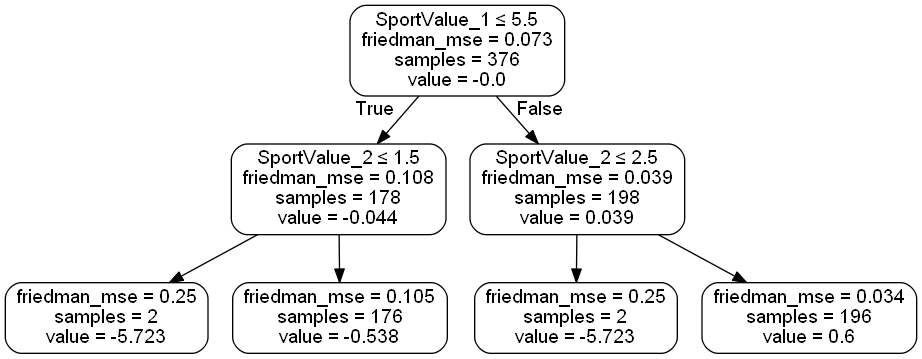

In [58]:
model = GradientBoostingClassifier(max_depth=2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

dot_data = StringIO()
sub_tree_42 = model.estimators_[0, 0]
export_graphviz(sub_tree_42, 
                out_file=dot_data, 
                feature_names=X.columns, class_names=X.columns,
                filled=False, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_png(name+'_arvore.png')
Image(graph.create_png())

In [59]:
model.estimators_[98,0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort='auto',
                      random_state=<mtrand.RandomState object at 0x000001FF25A7CD80>,
                      splitter='best')

In [60]:
len(model.estimators_)

100

In [61]:
len(model.estimators_)

100

In [62]:
model.estimators_[4]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort='auto',
                      random_state=<mtrand.RandomState object at 0x000001FF25A7CD80>,
                      splitter='best')], dtype=object)

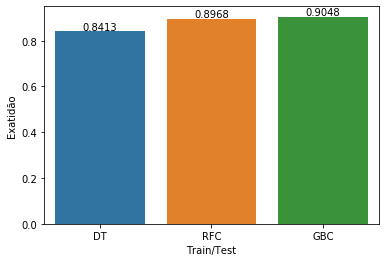

In [63]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
axis = sns.barplot(x = 'Nome', y = 'Exatidão', data = tr_split)
axis.set(xlabel='Train/Test', ylabel='Exatidão')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## KFold

In [64]:
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
names = []
scores = []

tInicio=time.time()
for name, model in models:
    t0=time.time()
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    print(model)
    model.fit(X,y) 
    names.append(name)
    scores.append(score)
    
    t1 = time.time()
    total = t1-t0
    print('duracao:',total)
    print("Features sorted by their score:")
    print(sorted(zip(map(lambda x: float("{0:.2f}".format(round(x, 4))), model.feature_importances_), X_train.columns),reverse=True))
    
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
tFinal = time.time(); total = tFinal-tInicio; print(total)

print(kf_cross_val)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
duracao: 0.1289196014404297
Features sorted by their score:
[(0.3, 'SportValue_2'), (0.24, 'SportPart_2'), (0.23, 'SportPart_1'), (0.22, 'SportValue_1')]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
duracao: 0.33179450035095215
Features sorted by their score:
[(0.27, 'SportValue_2'), (0.27, 'SportPart_1'), (0.24, 'SportValue_1'), (0.22, 'SportPart_2')]
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split

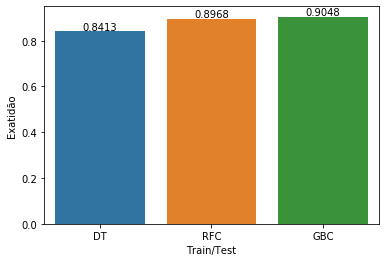

In [65]:
axis = sns.barplot(x = 'Nome', y = 'Exatidão', data = tr_split)
axis.set(xlabel='Train/Test', ylabel='Exatidão')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

**Train / Test**

Nome  Exatidão
- DT  0.833333
- RFC  0.865079
- GBC  0.880952

**KFold**

  Name     Score
- DT  0.834588
- RFC  0.890314
- GBC  0.904275

## Importância de cada variável na aproximação k-fold 

In [66]:
import numpy as np
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [67]:
importances = pd.DataFrame({'feature':X.columns})
for name, model in models:
    t0=time.time()
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    print(name)
    model.fit(X,y) 
    names.append(name)
    scores.append(score)
    
    t1 = time.time()
    total = t1-t0
    print('duracao:',total)
    importances[name] = np.round(model.feature_importances_,3)

importances = importances.set_index('feature')

DT
duracao: 0.1109304428100586
RFC
duracao: 0.32879638671875
GBC
duracao: 1.6409897804260254


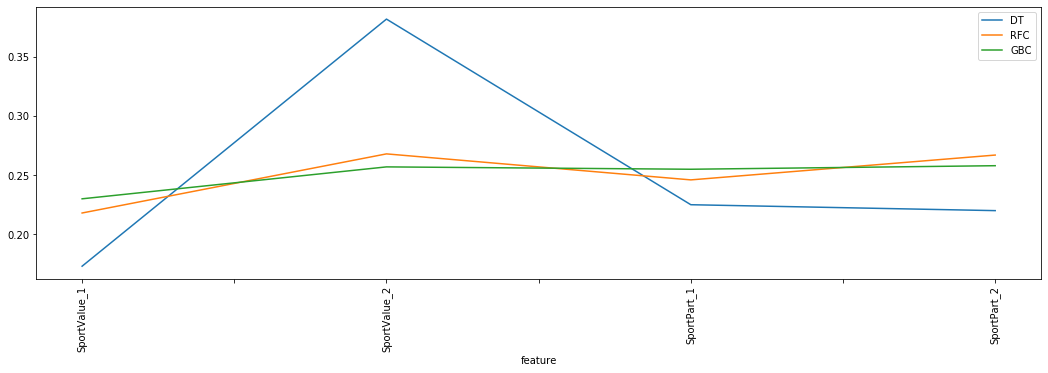

In [68]:
plt.rcParams['figure.figsize'] = [18, 5]
importances.plot()
plt.xticks(rotation=90);

# Vamos ver a importância de cada variável no random forest

In [69]:
importances = pd.DataFrame({'feature':X.columns})

kfold = KFold(n_splits=10, random_state=10) 
score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
model = RandomForestClassifier(n_estimators= 10, max_leaf_nodes=4)
model.fit(X,y) 

i=1
for tree in model.estimators_:
    t0=time.time()
    kfold = KFold(n_splits=10, random_state=10) 
    names.append(name)
    scores.append(score)
    
    t1 = time.time()
    total = t1-t0
    importances[i] = np.round(tree.feature_importances_,3)
    i+=1

importances = importances.set_index('feature')

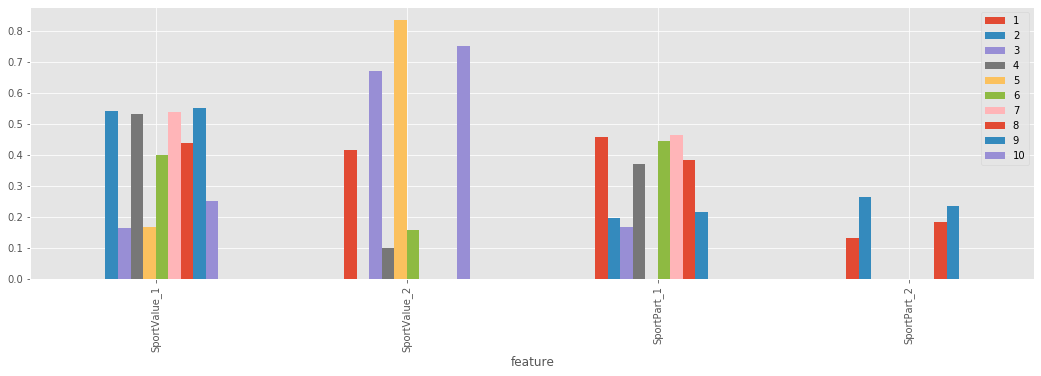

In [76]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [18, 5]
importances.plot.bar()
plt.xticks(rotation=90);

fig = plt.gcf() # "Get current figure"
plt.show()
#py.iplot_mpl(fig)